<a href="https://colab.research.google.com/github/LeonardoSer/Univ/blob/main/NetOpt/jupyter_notebooks/Exercises/PCST_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m pip install -i https://pypi.gurobi.com gurobipy
!sudo apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

import networkx as nx
import gurobipy as gb
import os
import matplotlib.pyplot as plt

In [96]:
# Drawing functions

def DrawInitG(G, withedges=False):
    
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}
    
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=600,
                           node_color='red')
    
    nx.draw_networkx_labels(G, pos=pos, font_color='w', font_size=12)
    
    if withedges:
        nx.draw_networkx_edges(G,pos=pos, alpha=1.0)
        labels = {(i,j):G.get_edge_data(i,j,'cost').get('cost') for i,j in G.edges()}
        nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
    
    plt.axis('off')
    plt.show()
    
def DrawSol(G, x):
    
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}

    
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=600,
                           node_color='red',
                           label=[G.nodes()])
    
    nx.draw_networkx_labels(G, pos=pos, font_color='w', font_size=12)
    
    for u,v in G.edges():
        if x[u,v].x > 0.01 and x[u,v].x < 0.9:
            nx.draw_networkx_edges(G, pos=pos,
                                   edgelist=[(u,v)],
                                   edge_color='r')
            
            nx.draw_networkx_edge_labels(G, pos=pos,
                                         edge_labels={(u,v):'{:.2f}'.format(x[u,v].x)})
        
        if x[u,v].x > 0.9:
            nx.draw_networkx_edges(G, pos=pos,
                                   edgelist=[(u,v)],
                                   edge_color='k')
        

    
    #edges_in_sol = [(u,v)  for u,v in G.edges() if x[u,v].x > 0.1]

    
    plt.axis('off')
    plt.show()
    
class args:
    filename = None
    figsize = 30,60
    scale = 40

In [97]:
# Read the graph in the graphML format

args.filename = 'ExPCST_2021.gml'

basename = os.path.splitext(args.filename)[0]

G = nx.read_graphml(args.filename, node_type=int)
print ("G has", G.number_of_nodes(), "nodes and", G.number_of_edges(), "edges")

G has 30 nodes and 435 edges


In [98]:
# rendiamo il grafo G diretto
D = G.to_directed()
root = 1
pos = {i:(G.nodes[i]['x'] * args.scale,G.nodes[i]['y'] * args.scale) for i in G.nodes()}
# DrawInitG(G, withedges=True)

In [99]:
G.nodes(data=True)

NodeDataView({1: {'y': 45, 'customer': 4739, 'revenue': 156, 'x': 22}, 2: {'y': 24, 'customer': 2607, 'revenue': 702, 'x': 32}, 3: {'y': 9, 'customer': 2269, 'revenue': 785, 'x': 32}, 4: {'y': 25, 'customer': 16100, 'revenue': 435, 'x': 4}, 5: {'y': 30, 'customer': 4608, 'revenue': 304, 'x': 37}, 6: {'y': 42, 'customer': 2954, 'revenue': 305, 'x': 24}, 7: {'y': 20, 'customer': 4062, 'revenue': 658, 'x': 11}, 8: {'y': 9, 'customer': 2045, 'revenue': 546, 'x': 27}, 9: {'y': 3, 'customer': 2517, 'revenue': 856, 'x': 20}, 10: {'y': 29, 'customer': 3013, 'revenue': 871, 'x': 15}, 11: {'y': 39, 'customer': 3983, 'revenue': 639, 'x': 16}, 12: {'y': 5, 'customer': 1109, 'revenue': 758, 'x': 17}, 13: {'y': 45, 'customer': 3217, 'revenue': 578, 'x': 19}, 14: {'y': 45, 'customer': 1434, 'revenue': 266, 'x': 15}, 15: {'y': 36, 'customer': 4616, 'revenue': 1000, 'x': 4}, 16: {'y': 32, 'customer': 3201, 'revenue': 369, 'x': 8}, 17: {'y': 22, 'customer': 4913, 'revenue': 708, 'x': 40}, 18: {'y': 26, 

In [100]:
G.edges(data=True)

EdgeDataView([(1, 2, {'cost': 2325}), (1, 3, {'cost': 3736}), (1, 4, {'cost': 2690}), (1, 5, {'cost': 2121}), (1, 6, {'cost': 360}), (1, 7, {'cost': 2731}), (1, 8, {'cost': 3634}), (1, 9, {'cost': 4204}), (1, 10, {'cost': 1746}), (1, 11, {'cost': 848}), (1, 12, {'cost': 4031}), (1, 13, {'cost': 300}), (1, 14, {'cost': 700}), (1, 15, {'cost': 2012}), (1, 16, {'cost': 1910}), (1, 17, {'cost': 2920}), (1, 18, {'cost': 2061}), (1, 19, {'cost': 4609}), (1, 20, {'cost': 3298}), (1, 21, {'cost': 1824}), (1, 22, {'cost': 2158}), (1, 23, {'cost': 2022}), (1, 24, {'cost': 1726}), (1, 25, {'cost': 4341}), (1, 26, {'cost': 1104}), (1, 27, {'cost': 806}), (1, 28, {'cost': 3298}), (1, 29, {'cost': 1345}), (1, 30, {'cost': 4001}), (2, 3, {'cost': 1500}), (2, 4, {'cost': 2801}), (2, 5, {'cost': 781}), (2, 6, {'cost': 1969}), (2, 7, {'cost': 2137}), (2, 8, {'cost': 1581}), (2, 9, {'cost': 2418}), (2, 10, {'cost': 1772}), (2, 11, {'cost': 2193}), (2, 12, {'cost': 2420}), (2, 13, {'cost': 2469}), (2, 14,

In [101]:
pcst = gb.Model()
pcst.ModelSense = gb.GRB.MAXIMIZE

# Variables definition

x = pcst.addVars(D.edges(), vtype=gb.GRB.BINARY, \
                 obj = [- D[i][j]['cost'] for i,j in D.edges()], \
                 name = 'x')

y = pcst.addVars (G.nodes(), vtype = gb.GRB.BINARY, \
                  obj = [G.nodes[i]['revenue'] for i in G.nodes()],\
                 name = 'y')

u = pcst.addVars (G.nodes(), vtype = gb.GRB.CONTINUOUS, 
                  lb = 0.0, ub = G.number_of_nodes(),\
                 name = 'u')

pcst.write('pcst.lp')


In [102]:
# Root is in the solution
pcst.addConstr(y[root] == 1, name = 'Fix')

pcst.update()

# Each node has exactly one incoming arc

pcst.addConstrs((x.sum('*',j) == y[j] for j in G.nodes() if j != root), name='Node')

# Precedence constraints (MTZ constraints)

pcst.addConstrs(((G.number_of_nodes() +  1) * x[i,j] + u[i] - u[j] <= G.number_of_nodes() for i,j in D.edges()), name = 'MTZ')

# Connectivity constraints

pcst.addConstrs((x[j,k] <= y[j] for j in G.nodes() \
                 if j != root for k in D.neighbors(j)), name = 'Connect')
pcst.update() 

pcst.write('pcst.lp')

In [103]:
pcst.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 1741 rows, 930 columns and 5163 nonzeros
Model fingerprint: 0x56c69178
Variable types: 30 continuous, 900 integer (900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [2e+02, 5e+03]
  Bounds range     [1e+00, 3e+01]
  RHS range        [1e+00, 3e+01]
Found heuristic solution: objective 156.0000000
Presolve removed 59 rows and 31 columns
Presolve time: 0.02s
Presolved: 1682 rows, 899 columns, 4988 nonzeros
Variable types: 29 continuous, 870 integer (870 binary)

Root relaxation: objective 5.578806e+03, 61 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 5578.80645    0   27  156.00000 5578.80645  3476%     -    0s
     0     0 4754.14516    0   35  156.00000 47

In [104]:
totalcost = 0

for i,j in D.edges():
        if x[i,j].x > 0.1:
            totalcost += D[i][j]['cost']

print ("Total cost", totalcost)

Total cost 11860


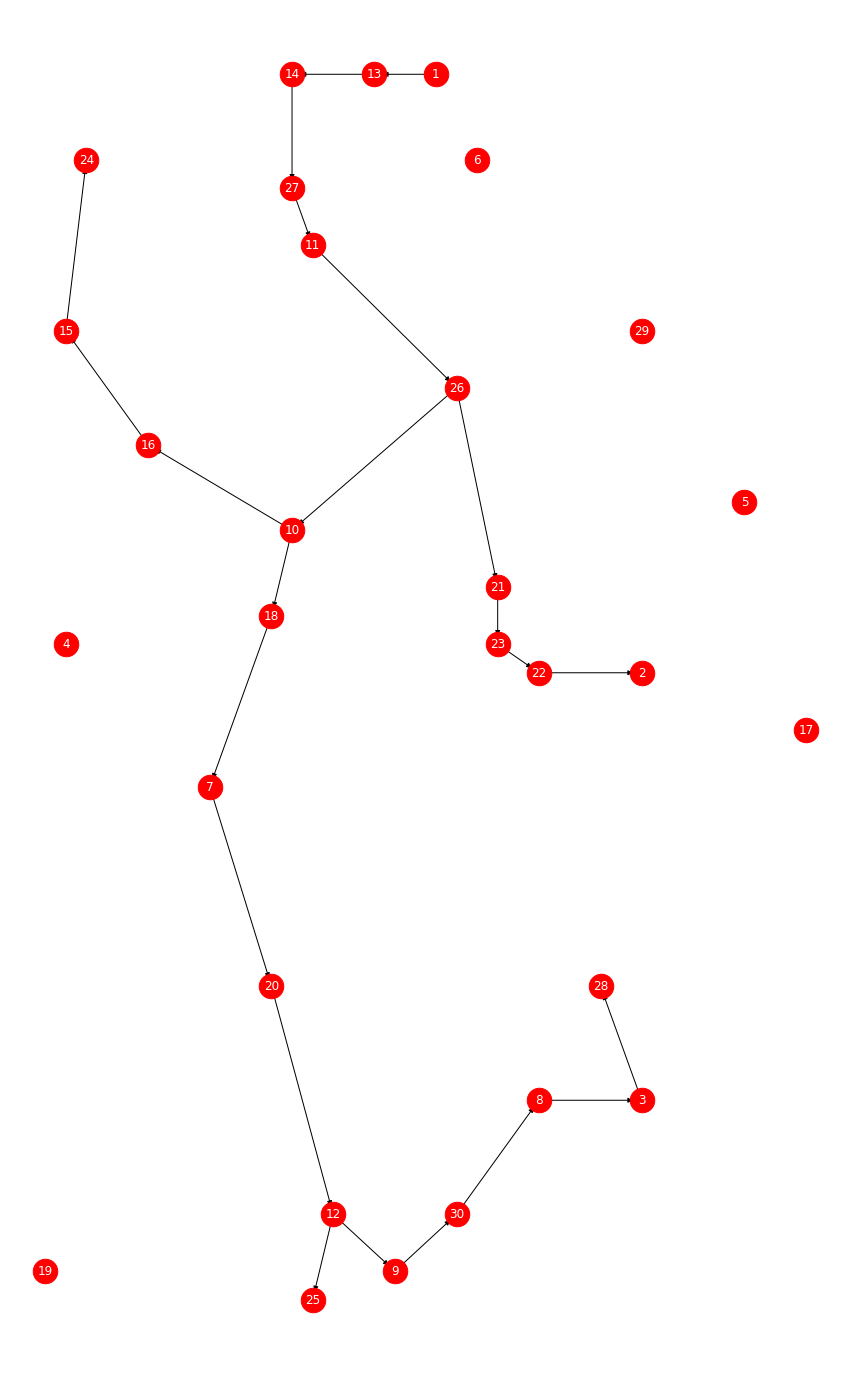

In [105]:
args.figsize = (15,25)
DrawSol(D,x)

In [106]:
pcst.addConstr(y.prod([G.nodes[i]["customer"] for i in G.nodes()]) >= 0.82*sum([G.nodes[i]["customer"] for i in G.nodes()]), name = 'Incentivo')
pcst.update() 
pcst.write('pcst.lp')
pcst.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 1742 rows, 930 columns and 5192 nonzeros
Model fingerprint: 0xe2912a61
Variable types: 30 continuous, 900 integer (900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+04]
  Objective range  [2e+02, 5e+03]
  Bounds range     [1e+00, 3e+01]
  RHS range        [1e+00, 1e+05]

MIP start from previous solve did not produce a new incumbent solution
MIP start from previous solve violates constraint Incentivo by 3503.180000000

Presolve removed 59 rows and 31 columns
Presolve time: 0.03s
Presolved: 1683 rows, 899 columns, 5078 nonzeros
Variable types: 29 continuous, 870 integer (870 binary)
Found heuristic solution: objective -40543.00000

Root relaxation: objective 5.221413e+03, 61 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent   

In [107]:
# l'incentivo toglie 1000$ al costo totale

totalcost = -1000

for i,j in D.edges():
        if x[i,j].x > 0.1:
            print (x[i,j])
            totalcost += D[i][j]['cost']

print ("Total cost", totalcost)

<gurobi.Var x[1,6] (value 1.0)>
<gurobi.Var x[1,13] (value 1.0)>
<gurobi.Var x[3,28] (value 1.0)>
<gurobi.Var x[6,26] (value 1.0)>
<gurobi.Var x[7,20] (value 1.0)>
<gurobi.Var x[8,3] (value 1.0)>
<gurobi.Var x[9,30] (value 1.0)>
<gurobi.Var x[10,16] (value 1.0)>
<gurobi.Var x[10,18] (value 1.0)>
<gurobi.Var x[12,9] (value 1.0)>
<gurobi.Var x[12,25] (value 1.0)>
<gurobi.Var x[13,14] (value 1.0)>
<gurobi.Var x[14,27] (value 1.0)>
<gurobi.Var x[15,24] (value 1.0)>
<gurobi.Var x[16,15] (value 1.0)>
<gurobi.Var x[18,7] (value 1.0)>
<gurobi.Var x[20,12] (value 1.0)>
<gurobi.Var x[21,23] (value 1.0)>
<gurobi.Var x[22,2] (value 1.0)>
<gurobi.Var x[23,22] (value 1.0)>
<gurobi.Var x[26,10] (value 1.0)>
<gurobi.Var x[26,21] (value 1.0)>
<gurobi.Var x[27,11] (value 1.0)>
<gurobi.Var x[30,8] (value 1.0)>
Total cost 11166


In [108]:
args.figsize = (15,25)
#DrawSol(D,x)

In [109]:
for e in D.out_edges(root, data=True):
    e[2]["cost"] = e[2]["cost"]/2

In [110]:
sum(x[root,i] for i in G.neighbors(root)) <= 8

<gurobi.TempConstr: <gurobi.LinExpr: x[1,2] + x[1,3] + x[1,4] + x[1,5] + x[1,6] + x[1,7] + x[1,8] + x[1,9] + x[1,10] + x[1,11] + x[1,12] + x[1,13] + x[1,14] + x[1,15] + x[1,16] + x[1,17] + x[1,18] + x[1,19] + x[1,20] + x[1,21] + x[1,22] + x[1,23] + x[1,24] + x[1,25] + x[1,26] + x[1,27] + x[1,28] + x[1,29] + x[1,30]> <= 8>

In [111]:
pcst.addConstr(sum(x[root,i] for i in G.neighbors(root)) <= 8, name="router")
# pcst.addConstr(sum(y[i] for i in G.neighbors(root)) <= 8, name="router") # questo da infeasible
pcst.update() 
pcst.write('pcst.lp')
pcst.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 1743 rows, 930 columns and 5221 nonzeros
Model fingerprint: 0x6999e700
Variable types: 30 continuous, 900 integer (900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+04]
  Objective range  [2e+02, 5e+03]
  Bounds range     [1e+00, 3e+01]
  RHS range        [1e+00, 1e+05]

MIP start from previous solve produced solution with objective 2974 (0.03s)
Loaded MIP start from previous solve with objective 2974

Presolve removed 59 rows and 31 columns
Presolve time: 0.03s
Presolved: 1684 rows, 899 columns, 5107 nonzeros
Variable types: 29 continuous, 870 integer (870 binary)

Root relaxation: objective 5.221413e+03, 61 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 5221.41317    0   16 2

In [112]:
# l'incentivo toglie 1000$ al costo totale e il router aggiunge 1500

totalcost = -1000 + 1500

for i,j in D.edges():
        if x[i,j].x > 0.1:
            print (x[i,j])
            totalcost += D[i][j]['cost']

print ("Total cost", totalcost)

<gurobi.Var x[1,6] (value 1.0)>
<gurobi.Var x[1,13] (value 1.0)>
<gurobi.Var x[3,28] (value 1.0)>
<gurobi.Var x[6,26] (value 1.0)>
<gurobi.Var x[7,20] (value 1.0)>
<gurobi.Var x[8,3] (value 1.0)>
<gurobi.Var x[9,30] (value 1.0)>
<gurobi.Var x[10,16] (value 1.0)>
<gurobi.Var x[10,18] (value 1.0)>
<gurobi.Var x[12,9] (value 1.0)>
<gurobi.Var x[12,25] (value 1.0)>
<gurobi.Var x[13,14] (value 1.0)>
<gurobi.Var x[14,27] (value 1.0)>
<gurobi.Var x[15,24] (value 1.0)>
<gurobi.Var x[16,15] (value 1.0)>
<gurobi.Var x[18,7] (value 1.0)>
<gurobi.Var x[20,12] (value 1.0)>
<gurobi.Var x[21,23] (value 1.0)>
<gurobi.Var x[22,2] (value 1.0)>
<gurobi.Var x[23,22] (value 1.0)>
<gurobi.Var x[26,10] (value 1.0)>
<gurobi.Var x[26,21] (value 1.0)>
<gurobi.Var x[27,11] (value 1.0)>
<gurobi.Var x[30,8] (value 1.0)>
Total cost 12336.0


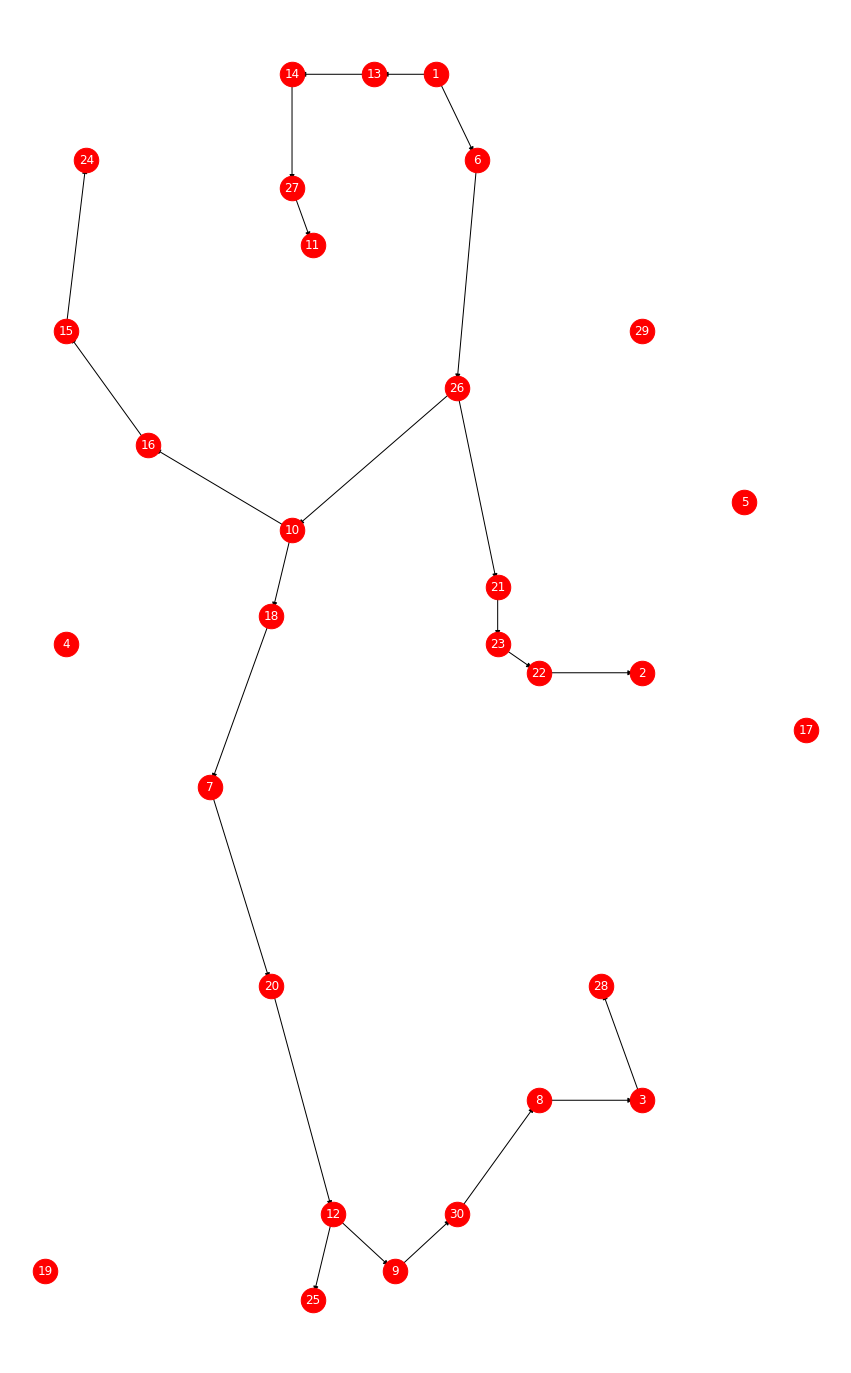

In [113]:
args.figsize = (15,25)
DrawSol(D,x)